### Predictive Analytics: Part 1 - Working with data

- loading a dataset
- exploring a dataset
[I'm an inline-style link](https://www.google.com)

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Loading a CSV file

In [98]:
music = pd.read_csv('../Data_Visualization/Data/top10s.csv',encoding="utf8")

### Install a library in Jupyter

In [20]:
# !pip install seaborn

### Exploring the dataset

In [105]:
music

,title,artist,topgenre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


### List of columns and fields

In [106]:
list(music)

['title',
 'artist',
 'topgenre',
 'year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop']

### Review the summary of dataset

In [8]:
music.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


### Outlier detection using Box plot

In [117]:
column_='acous'
np.percentile(music[column_], 50)
q75, q25 = np.percentile(music[column_], [75 ,25])
iqr = q75 - q25
music[column_][music[column_]>1.5*iqr+q75]

8      74
36     83
40     47
44     85
52     89
       ..
573    58
574    75
578    56
591    48
592    57
Name: acous, Length: 66, dtype: int64

In [125]:
ages= [12, 34, 43, 45, 56, 67, 69, 70, 71, 71, 76, 100, 111]
ages_df=pd.DataFrame(ages,columns=['age'])

q75, q25 = np.percentile(ages, [75 ,25])
iqr = q75 - q25
ages_df[ages_df['age']>(1.5*iqr+q75)]

,age
12,111


In [ ]:
# ages_df.hist(bins='auto')

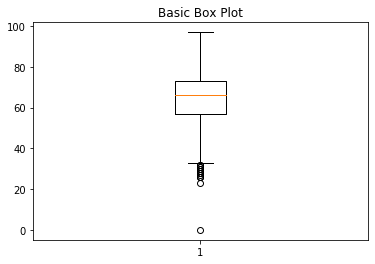

In [126]:

fig, ax = plt.subplots()
ax.set_title('Basic Box Plot')
ax.boxplot(music['dnce'])
plt.show()

### Seaborn library

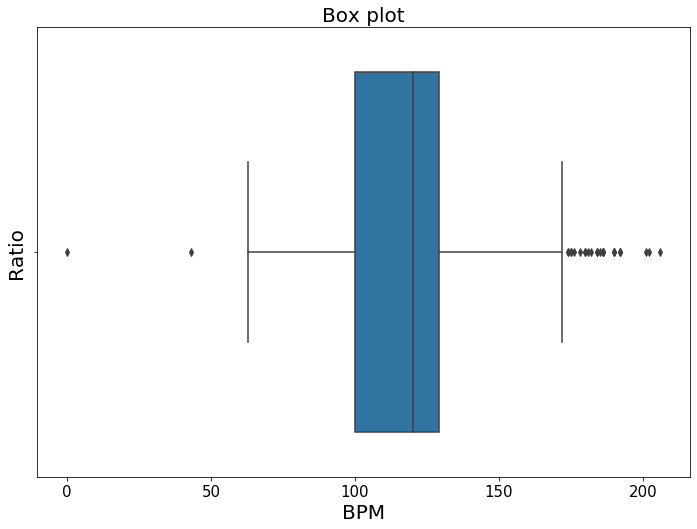

In [129]:

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x=music["bpm"])
ax.set(
    xlabel='BPM', 
    ylabel='Rate'
)
ax.axes.set_title("Box plot",fontsize=20)
ax.set_xlabel("BPM",fontsize=20)
ax.set_ylabel("Ratio",fontsize=20)
ax.tick_params(labelsize=15)


### Box plot based on different features (columns)

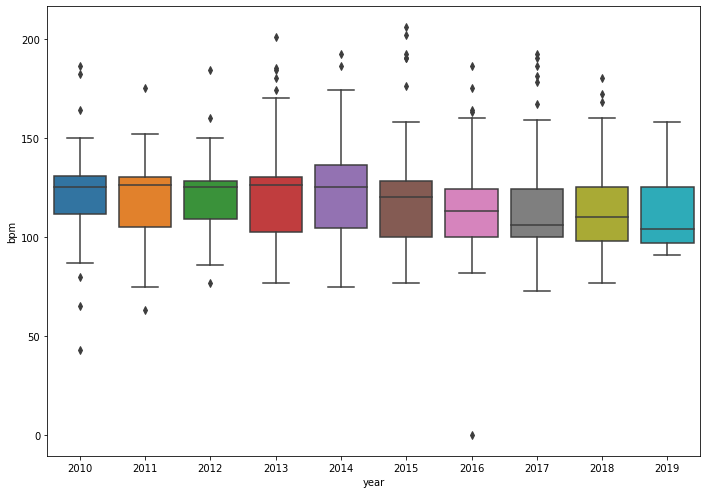

In [42]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x="year", y="bpm", data=music)

### Standard deviation in the column

In [133]:
np.std(music['year'])

2.6048945481611154

In [66]:
pivot_year=pd.pivot_table(music,index=["year"],values=["bpm"],aggfunc=np.mean)
pivot_year=pivot_year.reset_index()
pivot_year

,year,bpm
0,2010,122.058824
1,2011,119.075472
2,2012,121.085714
3,2013,121.676056
4,2014,123.000000
5,2015,119.768421
6,2016,114.325000
7,2017,116.800000
8,2018,114.593750
9,2019,112.451613


### Drawing error bar

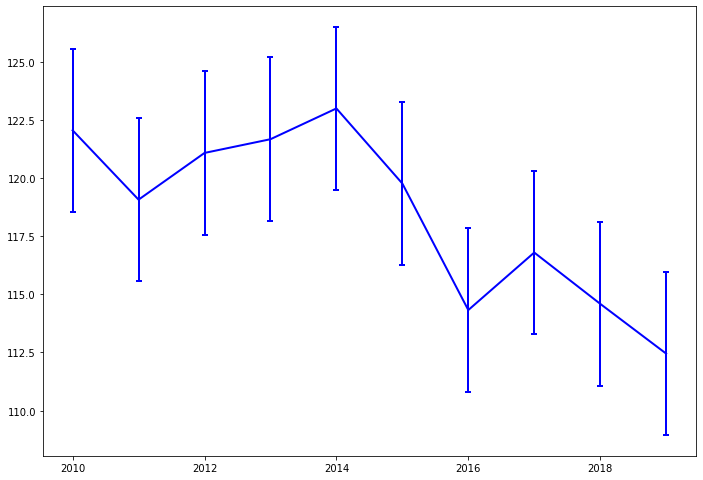

In [70]:

xaxis = np.array(music['year'].drop_duplicates())

lineStyle={"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":3}

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

# Create an error bar for each dataset
line_City_A=ax.errorbar(pivot_year['year'], pivot_year['bpm'], yerr=np.std(pivot_year['bpm']), **lineStyle, color='blue', label='BPM')

# for more information you can visit: https://towardsdatascience.com/using-standard-deviation-in-python-77872c32ba9b

### Normal distribution of columns

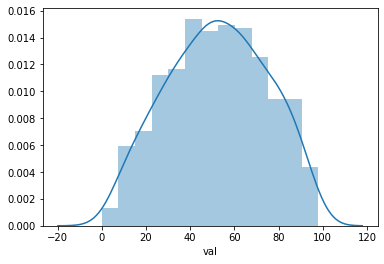

In [75]:
# sns.distplot(music['bpm'], bins=30)
sns.distplot(music['val'], bins='auto');
# We can see a Gaussian-like shape to the data, 
# that although is not strongly the familiar bell-shape, is a rough approximation.

In [ ]:
music['year'].hist(bins='auto')

#### If Data Is Gaussian, Use Parametric Statistical Methods, Else: Use Nonparametric Statistical Methods. 

### Quantile-Quantile Plot
Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.



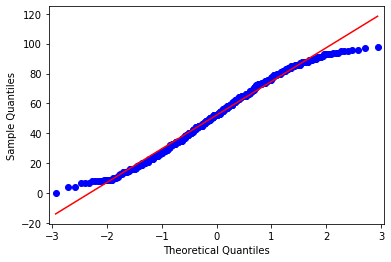

In [83]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(music['val'], line='s')
pyplot.show()

### Statistical Normality Tests
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution. Each test makes different assumptions and considers different aspects of the data.We will look at 3 commonly used tests in this section that you can apply to your own data samples.Each test will return at least two things:
- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. I
The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value. In the SciPy implementation of these tests, you can interpret the p value as follows.

- p <= alpha: reject H0, not normal.
- p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution. A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

### Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.



In [92]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
data = 5 * randn(100) + 50

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [36]:
music.skew()

year     -0.185988
bpm       0.537042
nrgy     -0.985194
dnce     -0.679595
dB      -12.449699
live      1.716040
val      -0.073908
dur       1.339546
acous     2.202629
spch      2.540666
pop      -1.427679
dtype: float64

In [37]:
music.kurtosis()

year      -0.967266
bpm        1.709204
nrgy       1.048001
dnce       1.064175
dB       237.805103
live       3.111358
val       -0.822009
dur        4.179131
acous      4.475531
spch       7.096377
pop        3.598687
dtype: float64

In [6]:
# Create a dummy variable using One-Hot approach
import pandas as pd

music_dummy=music[['artist','year','bpm','topgenre']]
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([music_dummy,pd.get_dummies(music_dummy['topgenre'], prefix='genre')],axis=1)
df.drop(['topgenre'],axis=1, inplace=True)
display(df)

,artist,year,bpm,genre_acoustic pop,genre_alaska indie,genre_alternative r&b,genre_art pop,genre_atl hip hop,genre_australian dance,genre_australian hip hop,...,genre_house,genre_indie pop,genre_irish singer-songwriter,genre_latin,genre_metropopolis,genre_moroccan pop,genre_neo mellow,genre_permanent wave,genre_pop,genre_tropical house
0,Train,2010,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Eminem,2010,87,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kesha,2010,120,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lady Gaga,2010,119,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bruno Mars,2010,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Mark Ronson,2019,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,Ed Sheeran,2019,95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
600,DJ Khaled,2019,136,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601,Mark Ronson,2019,114,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Categorical count
music['topgenre'].value_counts()
percent100 = music['topgenre'].value_counts(normalize=True).mul(100).round(1).astype(str) 
top_genre=pd.DataFrame({'counts': music['topgenre'].value_counts(), 'per100': percent100}).head(5)
top_genre

,counts,per100
dance pop,327,54.2
pop,60,10.0
canadian pop,34,5.6
boy band,15,2.5
barbadian pop,15,2.5
